# Data Management
### 1.  Set some values to missing, ensure that SAS disregards these values:
data include response categories that don't help you answer your question, even though they provide information<br>
**if S3AQ3B1 = 9 then S3AQ3B1 = .;**<br>
**A dot or period is the way that missing data is specified in SAS**
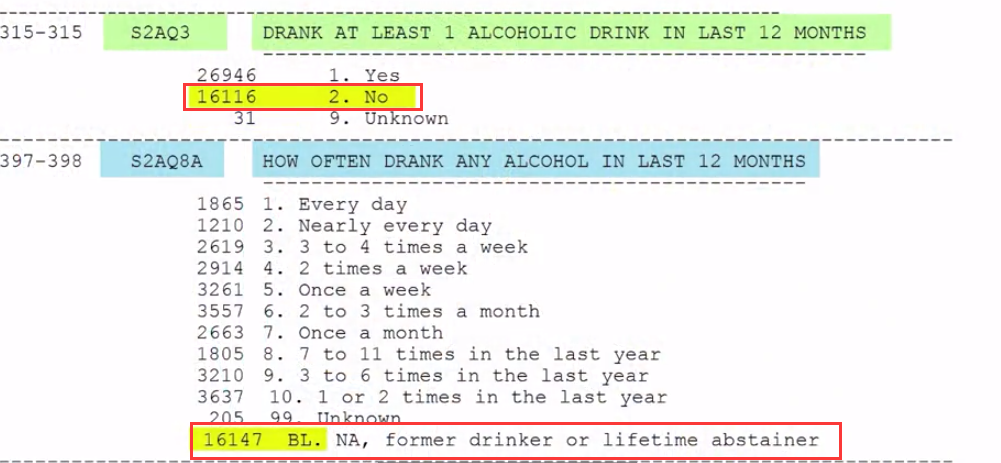
### 2. Recover valid information: like "Skip pattern" which are the questions that don't need to answer,
eg: people who don't drink alcohol don't need to answer how often drank any alcohol in last 12 months, the area will be left blank, and we need to recover this useful information<br>
**if S2AQ3 NE 9 and S2AQ8A=. then S2AQ8A=11;**<br>
**Creates a dummy code for this variable in order to recover valid information that was previously set as blank**
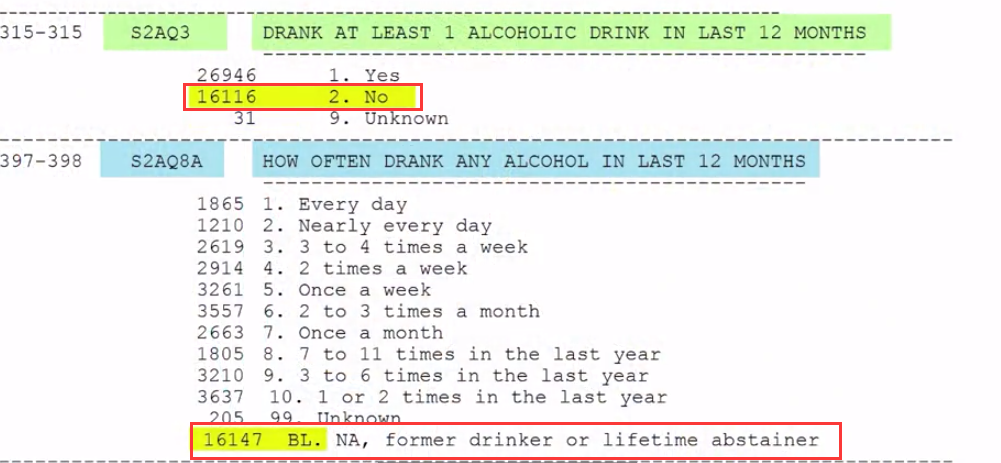


### 3. Create secondary variables
For example:<br>
1.<br>
NUMCIGMO_EST = USFREQMO * S3QA3C1;
<br>
<br>
2.<br>
/* create secondary variables*/<br>
if H1ED1 NE . and SKIP NE . then SKIPSCH=H1ED1+SKIP;<br>
else if H1ED1 EQ . and SKIP NE . then SKIPSCH=SKIP;<br>
else if H1ED1 NE . and SKIP EQ . then SKIPSCH=H1ED1;<br>
else SKIPSCH=.;

### 4. Group Variables
if H1ED2 EQ 0 then SIKP=0;<br>
else if H1ED2 LE 2 then SIKP=1;<br>
else if H1ED2 LE 10 then SKIP=2;<br>
else if H1ED2 GE 11 then SKIP=3;<br>
<br>
<br>
SKIPSCH=H1ED1+SKIP;

# SAS Programming

/*access the data from cloud data library*/<br>
libname mylib "/courses/d1406ae5ba27fe300" access=readonly;<br>
<br>
/*read the specific dataset*/<br>
data new; set mylib.addhealth_pds;<br>
<br>
/*add label to variables*/<br>
label H1GH2="how often have you had a headache" <br>
    H1DA1="times walk around the house" <br>
    H1DA2="times did you do your hobbies" <br>
    H1DA4="times did you go roller-blading/bycycling and so on"<br>
    H1DA5="time did you play an active sport" <br>
    H1DA6="time did you do exercise" <br>
    H1DA7="times did you hang out with friends" <br>
    H1ED1="times absent from school with an excuse" <br>
    H1ED2="times skipped school without an excuse";<br>

/* manage missing data*/<br>
if H1GH2=6 or H1GH2=8 then H1GH2=.;<br>
if H1DA1=6 or H1DA1=8 then H1DA1=.;<br>
if H1DA2=6 or H1DA2=8 then H1DA2=.;<br>
if H1DA4=6 or H1DA4=8 then H1DA4=.;<br>
if H1DA5=6 or H1DA5=8 then H1DA5=.;<br>
if H1DA6=6 or H1DA6=8 then H1DA6=.;<br>
if H1DA7=6 or H1DA7=8 then H1DA7=.;<br>
if H1ED1=6 or H1ED1=7 or H1ED1=8 or H1ED1=9 then H1ED1=.;<br>
if H1ED2=996 or H1ED2=997 or H1ED2=998 then H1ED2=.;<br>

/* collapse absent school without an execuse data */<br>
if H1ED2 LE 0 then SKIP=0;<br>
else if H1ED2 LE 2 then SKIP=1;<br>
else if H1ED2 LE 10 then SKIP=2;<br>
else SKIP=3;<br>
<br>
/* create secondary variables*/<br>
if H1ED1 NE . and SKIP NE . then SKIPSCH=H1ED1+SKIP;<br>
else if H1ED1 EQ . and SKIP NE . then SKIPSCH=SKIP;<br>
else if H1ED1 NE . and SKIP EQ . then SKIPSCH=H1ED1;<br>
else SKIPSCH=.;<br>
<br>
label SKIP="collapsed: times skipped school without an excuse"<br>
	SKIPSCH="total times skipped school"<br>
	<br>
/*subset the data*/<br>
<br>
/*sort data*/<br>
proc sort; by aid;<br>
<br>
/* print variables*/<br>
/*proc print; var H1ED1 SKIP SKIPSCH;*/<br>
proc freq; tables /*H1GH2 H1DA1 H1DA2 H1DA4 H1DA5 H1DA6 H1DA7*/ H1ED1 /*H1ED2*/ SKIP SKIPSCH;<br>
run;<br>